<a href="https://colab.research.google.com/github/yuki86/robotica/blob/master/previa_exer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

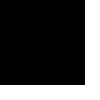

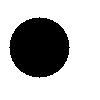

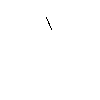

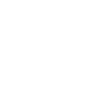

In [33]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import random
amostras = 100    #pode substituir o número por 

#tamanho da área disponível
altura = amostras
largura = amostras

#cria dataset
f = open("dataset_exe1.csv", "w")
data = ""
for py in range(0,altura):
  for px in range(0, largura):
    data = data + "P"+str(py)+str(px)+","
data = data + "Saida\n"
f.write( data )

#lê dataset e transforma em matriz (eu acho...) QUADRADO
for amostra in range(0,amostras):
  imgq = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      imgq[px][py][0] = 255   # cor azul
      imgq[px][py][1] = 255   # cor verde
      imgq[px][py][2] = 255   # cor vermelho

#define dimensões random da forma
  tamanho = random.randint(0, amostras)
  xmin = random.randint(0, amostras - tamanho) 
  ymin=xmin 
  xmax=(xmin+tamanho)
  ymax=xmax

#gera a forma de um quadrado
  cv2.rectangle(imgq,(xmin, ymin),(xmax,ymax),(0,0,0),-1)
  #forma(arquivo,(coordenadas do ínicio -> x,y), (coordenadas do final -> x,y), (cores RGB), espessura -> -1 equivale a preenchido)


#lê dataset e transforma em matriz (eu acho...) CIRCULO
for amostra in range(0,amostras):
  imgc = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      imgc[px][py][0] = 255   # cor azul
      imgc[px][py][1] = 255   # cor verde
      imgc[px][py][2] = 255   # cor vermelho

#define dimensões random da forma
xcentro = random.randint(1, amostras-1) 
ycentro = random.randint(1, amostras-1) 
raio=random.randint(1,(amostras/2))

#gera a forma de um círculo
while (raio >= (amostras-xcentro) or raio >= (amostras-ycentro) or raio >= (xcentro-0) or raio >= (ycentro-0)):
  raio=random.randint(1,(amostras/2))
else:
  cv2.circle(imgc,(xcentro, ycentro), raio, (0,0,0), -1)
  #(arquivo,(coordenadas do centro -> x,y), raio, (cores RGB), espessura -> -1 equivale a preenchido)



#lê dataset e transforma em matriz (eu acho...) TRIANGULO
for amostra in range(0,amostras):
  imgt = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      imgt[px][py][0] = 255   # cor azul
      imgt[px][py][1] = 255   # cor verde
      imgt[px][py][2] = 255   # cor vermelho

#define dimensões random da forma
xe=random.randint(0, amostras)
ye=random.randint(0, amostras)
xp=random.randint(0, amostras)
yp=random.randint(0, amostras)
xd=random.randint(0, amostras)
yd=random.randint(0, amostras)

#gera a forma de um triângulo
while (yp >= ye or yp >= yd or xd <= xe):
  xe=random.randint(0, amostras)
  ye=random.randint(0, amostras)
  xp=random.randint(0, amostras)
  yp=random.randint(0, amostras)
  xd=random.randint(0, amostras)
  yd=random.randint(0, amostras)

else:
  #[[coordenadas do vértice esquerdo -> x,y], [coordenadas do vértice central -> x,y], [coordenadas do vértice direito -> x,y] obs: y do esquerdo e direito iguais para base reta)
  pts = np.array([[xe,ye],[xp,yp],[xd,yd]], np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.fillPoly(imgt, [pts], color=(0, 0, 0)) #este comando faz o mesmo que a espessura -1

#AQUI AINDA NÃO FUNCIONA
#escolha random da figura a mostrar
img = [imgq, imgc, imgt]
random.choice(img)
for amostra in range(0,amostras):
  img = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      img[px][py][0] = 255   # cor azul
      img[px][py][1] = 255   # cor verde
      img[px][py][2] = 255   # cor vermelho
#VAI ATÉ AQUI! MEXER NESSE BLOCO.
 
#lê a forma gerada e salva as informações (eu acho...)  
  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + str(int(img[px][py][0]))+","
  data = data + "0\n"

  f.write( data )

f.close()

#mostra a figura gerada
cv2_imshow(imgq)
cv2_imshow(imgc)
cv2_imshow(imgt)
cv2_imshow(img)